# 数据预览

In [31]:
import pandas as pd

file = 'file/rumor_info.csv'

df = pd.read_csv(file)

print(df.columns)
print()
print(df.dtypes)

Index(['userCertify', 'forward', 'praise', 'pic_num'], dtype='object')

userCertify    int64
forward        int64
praise         int64
pic_num        int64
dtype: object


In [50]:
df.head()

,userCertify,forward,praise,pic_num
0,0,0,0,3
1,0,0,0,1
2,0,0,0,1
3,0,0,0,2
4,0,0,0,0


In [32]:
df.describe()

,userCertify,forward,praise,pic_num
count,24989.000000,24989.000000,24989.000000,24989.000000
mean,0.219657,27.830125,3.312457,0.938693
std,0.465356,755.168518,118.854603,1.450922
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,2.000000,60667.000000,9232.000000,9.000000


# 特征工程

In [130]:
# encoding:utf-8

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid')
# sns.set()
sz = (15,8)

## 2.1 用户认证情况

([<matplotlib.axis.XTick at 0x11862ada0>,
 <a list of 3 Text xticklabel objects>)

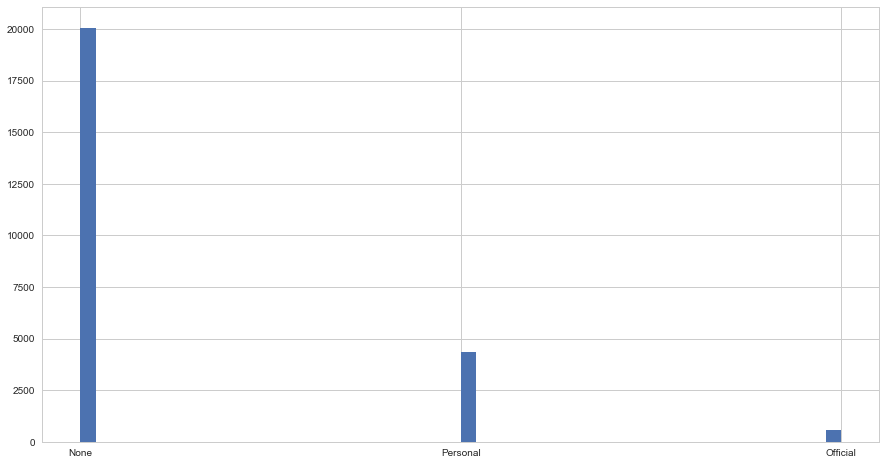

In [40]:
df['userCertify'].hist(figsize=sz, bins=50)
plt.xticks([0, 1, 2], ['None','Personal','Official'])

userCertify
0    20064
1     4361
2      564
Name: forward, dtype: int64


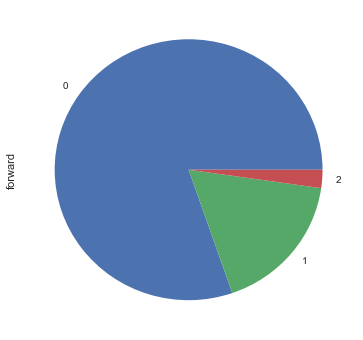

In [44]:
print(df.groupby('userCertify')['forward'].count())
df.groupby('userCertify')['forward'].count().plot.pie(figsize=(6, 6))

## 2.2 转发量

In [59]:
import numpy as np

lim_mean = df['forward'].mean()
df['forward'].describe()

count    24989.000000
mean        27.830125
std        755.168518
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      60667.000000
Name: forward, dtype: float64

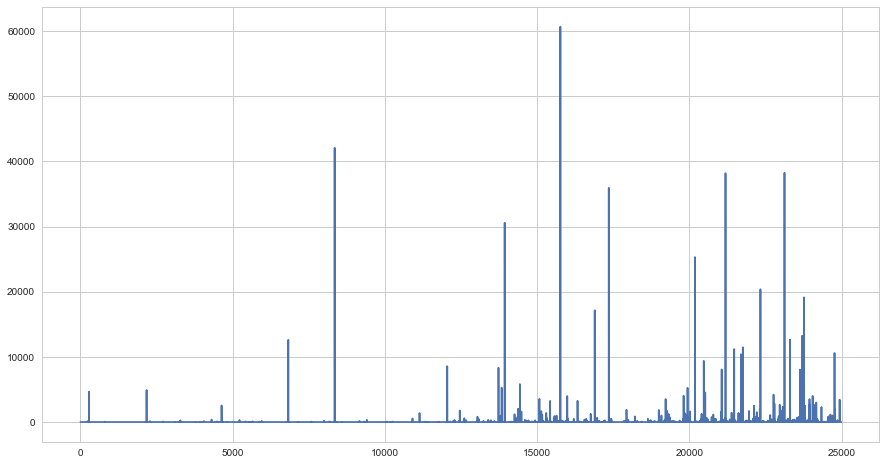

In [53]:
df['forward'].plot(figsize=sz)

### 直方图

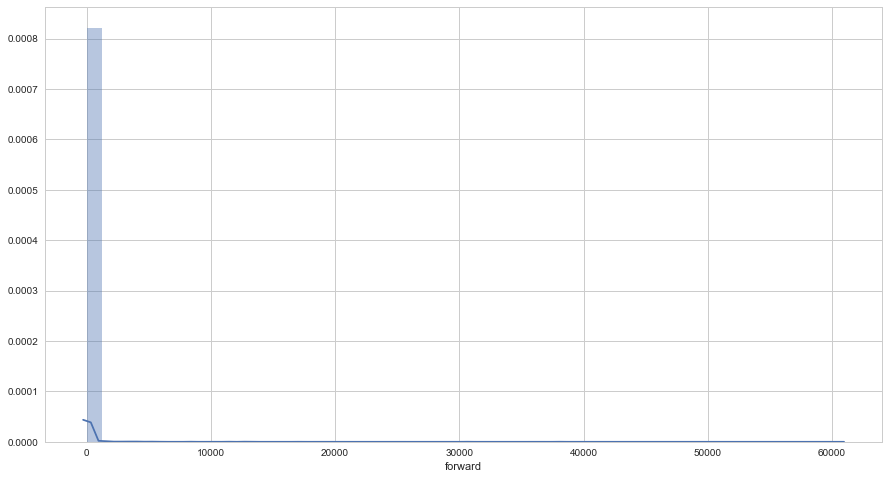

In [85]:
plt.figure(figsize=sz)
sns.distplot(df['forward'])

### 取log

In [86]:
# df['forward'].plot(figsize=sz, kind='kde')
# plt.xlim([0, 10 * lim_mean])

# df['forward_log'] = np.log(df['forward'] + 1)

# plt.figure(figsize=sz)
# sns.distplot(df['forward'])

## 2.3 点赞量

In [87]:
lim_mean = df['praise'].mean()
df['praise'].describe()

count    24989.000000
mean         3.312457
std        118.854603
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9232.000000
Name: praise, dtype: float64

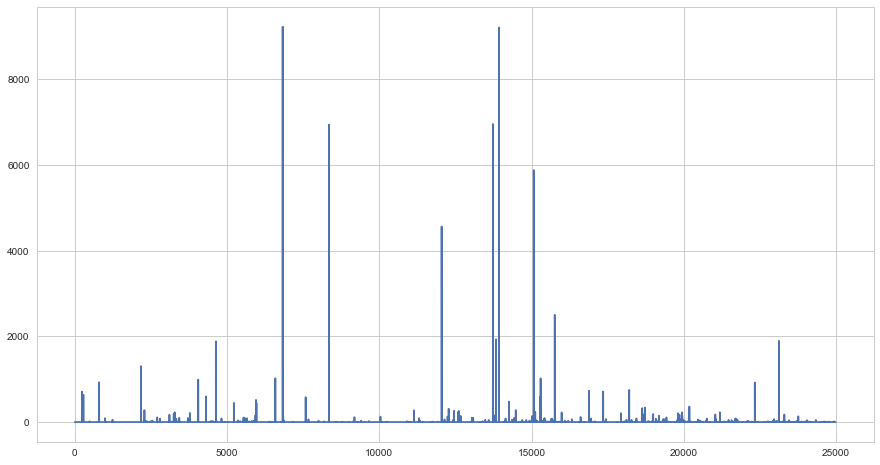

In [89]:
df['praise'].plot(figsize=sz)

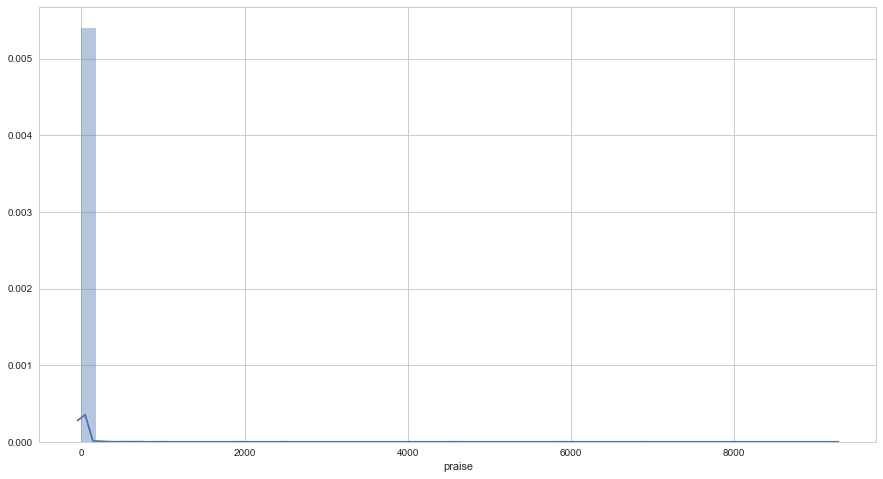

In [90]:
plt.figure(figsize=sz)
sns.distplot(df['praise'])

## 2.4 图片数量

In [91]:
df['pic_num'].describe()

count    24989.000000
mean         0.938693
std          1.450922
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: pic_num, dtype: float64

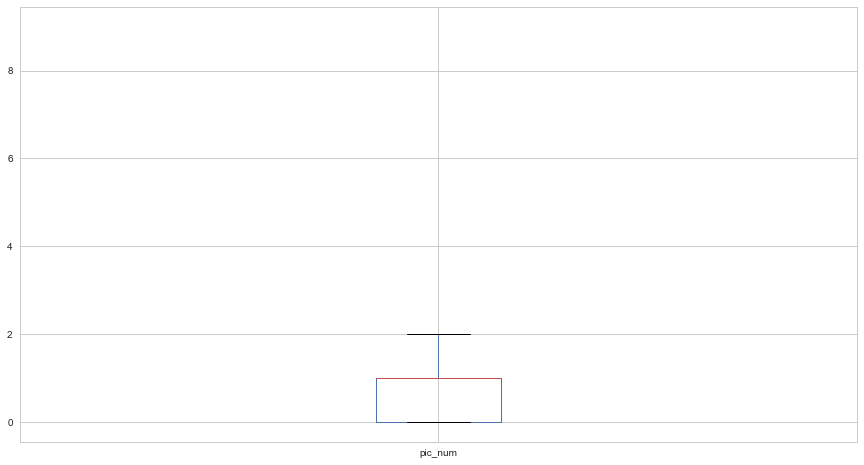

In [96]:
df['pic_num'].plot.box(figsize=sz)

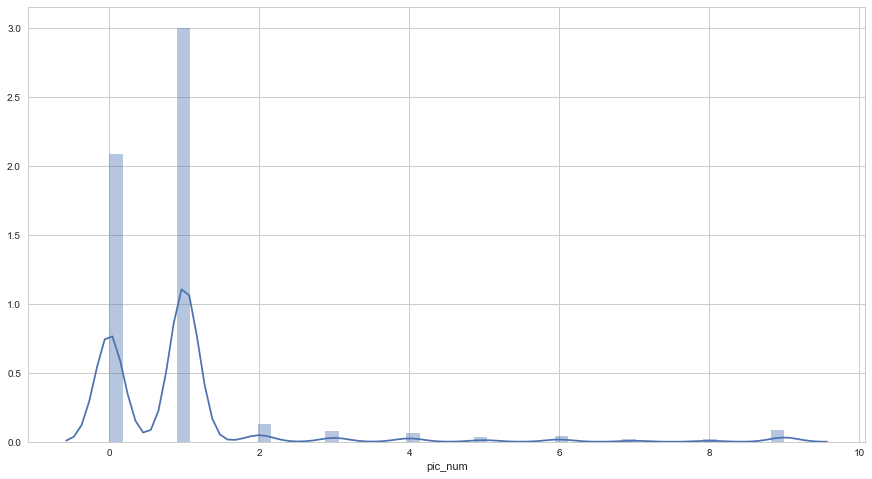

In [110]:
plt.figure(figsize=sz)
sns.distplot(df['pic_num'])

## 3.1 是否认证 => 转发、点赞

### 是否认证 => 转发量的影响

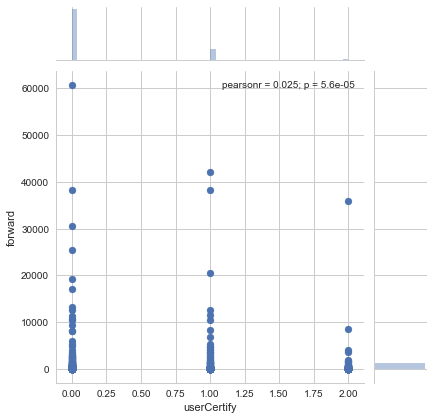

In [121]:
plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="forward", data=df)

### 是否认证 => 点赞量的影响

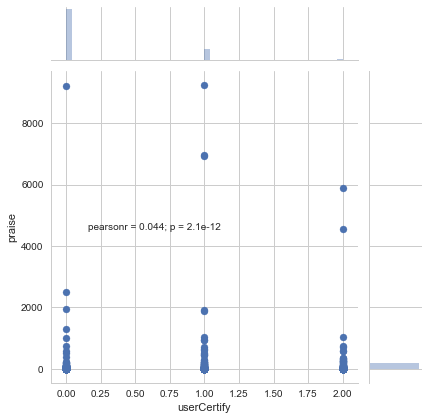

In [122]:
plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="praise", data=df)

## 3.2 是否认证 => 图片数量

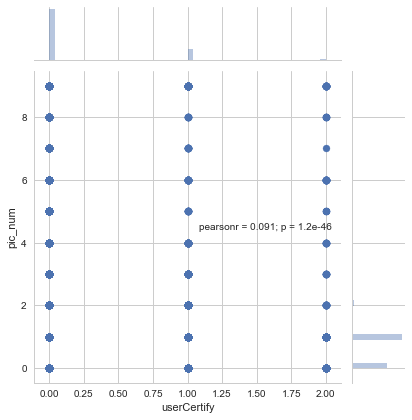

In [135]:
plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="pic_num", data=df)

count    24989.000000
mean         0.938693
std          1.450922
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: pic_num, dtype: float64


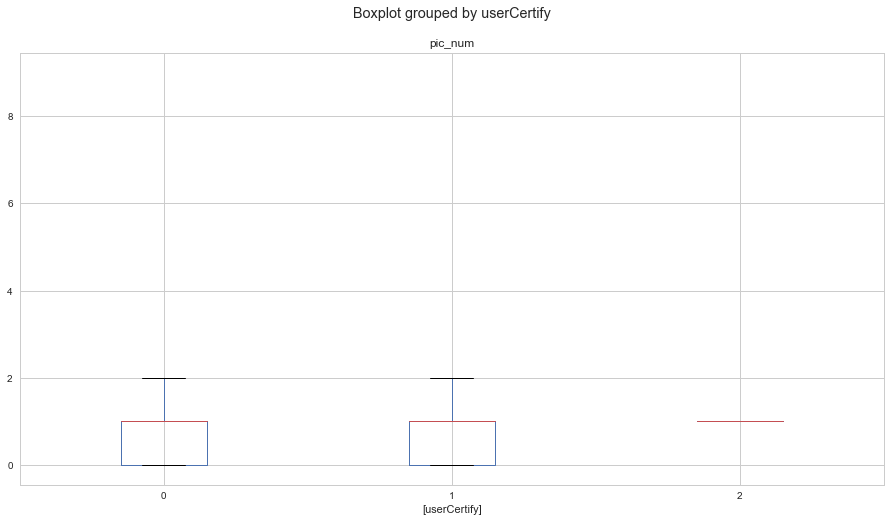

In [131]:
print(df['pic_num'].describe())
df[['userCertify', 'pic_num']].boxplot(by='userCertify', figsize=sz)

## 3.3 图片数量 => 转发、点赞量

### 图片数量 => 转发量

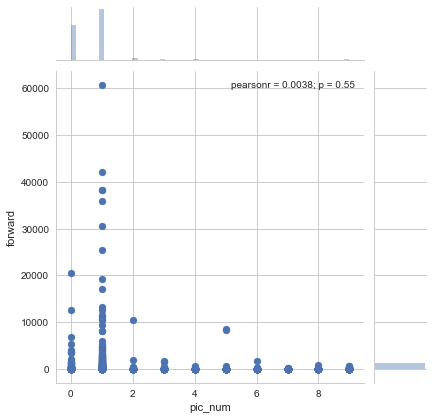

In [136]:
plt.figure(figsize=(15,15))
sns.jointplot(x='pic_num', y="forward", data=df)

### 图片数量 => 点赞量

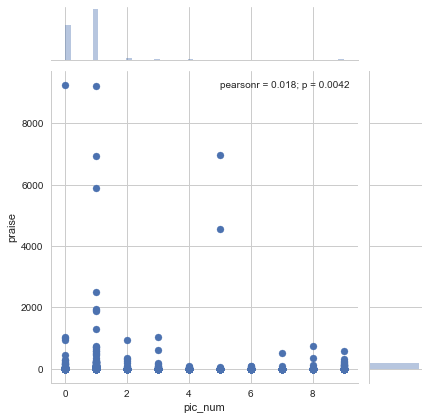

In [138]:
plt.figure(figsize=(15,15))
sns.jointplot(x='pic_num', y="praise", data=df)